### Handwritten digit classification using Neural Network

In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [6]:
(X_train,y_train) ,(X_test,y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 7s 1us/step


In [11]:
len(X_train)

60000

In [12]:
len(X_test)

10000

In [38]:
X_train = X_train/255
X_test = X_test/255

In [39]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
X_train[0].shape

(28, 28)

In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

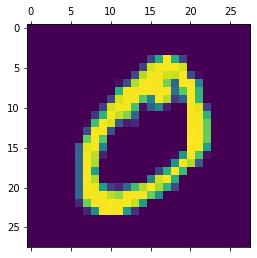

In [24]:
plt.matshow(X_train[1])

In [21]:
y_train[2]

4

In [23]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [25]:
X_train.shape

(60000, 28, 28)

In [40]:
X_tain_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_tain_flatten.shape

(60000, 784)

In [41]:
X_test_flattened.shape

(10000, 784)

In [42]:
X_test.shape

(10000, 28, 28)

In [43]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')])

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(X_tain_flattened,y_train,epochs=5)
    

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7220 - accuracy: 0.8128
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3037 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2864 - accuracy: 0.9186
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9245
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2728 - accuracy: 0.9251


In [44]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2685 - accuracy: 0.9237


[0.2684674859046936, 0.9236999750137329]

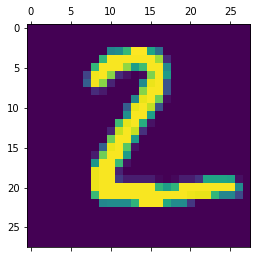

In [52]:
plt.matshow(X_test[1])

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

array([4.7708932e-01, 5.9471428e-03, 9.9951905e-01, 4.3175399e-01,
       9.6308306e-10, 8.8898158e-01, 8.9414382e-01, 1.0395852e-12,
       1.4135796e-01, 3.9811092e-09], dtype=float32)

In [54]:
np.argmax(y_predicted[1])

2

In [56]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [60]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [62]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    6,    2,    1,    0],
       [   0, 1115,    3,    2,    0,    2,    4,    2,    7,    0],
       [   3,    9,  935,   15,    9,    5,   12,   10,   30,    4],
       [   2,    0,   24,  921,    1,   29,    1,   10,   13,    9],
       [   1,    1,    5,    2,  926,    0,    9,    4,    6,   28],
       [   7,    3,    5,   30,    9,  793,   13,    6,   20,    6],
       [  12,    3,    9,    1,    7,   18,  905,    2,    1,    0],
       [   1,    6,   26,    6,    8,    0,    0,  947,    1,   33],
       [   8,   10,    8,   33,   10,   43,    9,   14,  826,   13],
       [  10,    7,    2,   11,   35,    9,    0,   26,    2,  907]])>

Text(69.0, 0.5, 'Truth')

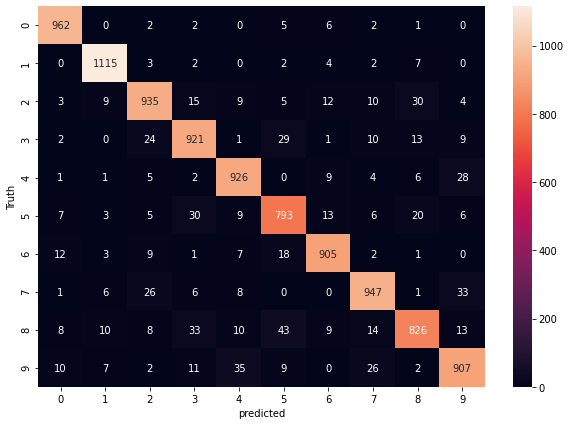

In [66]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [68]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])   

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(X_tain_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4467 - accuracy: 0.8751
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1343 - accuracy: 0.9602
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9748
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0657 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0506 - accuracy: 0.9840


In [69]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9758


[0.0767250657081604, 0.9757999777793884]

Text(69.0, 0.5, 'Truth')

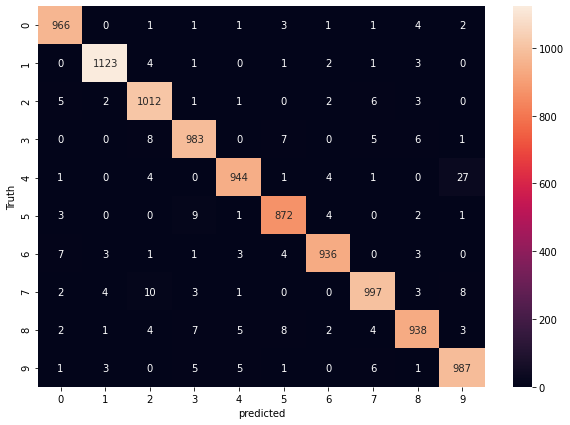

In [70]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [76]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])   

model.compile(
    optimizer='adam',
    loss ='sparse_categorical_crossentropy',
    metrics=['accuracy']

)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4673 - accuracy: 0.8700
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1321 - accuracy: 0.9619
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0918 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0668 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0508 - accuracy: 0.9841
